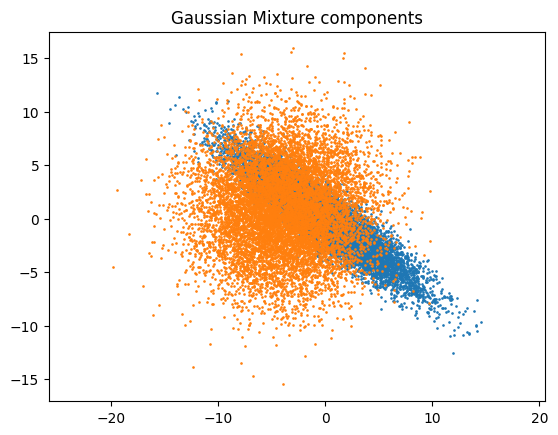

In [107]:
# Generate some random data vectors to clusterize

import numpy as np

n_samples = 10000
np.random.seed(30)
C = np.array([[3.8, -2.1], [1.7, -2.4]])
component_1 = np.dot(np.random.randn(n_samples, 2), C)  # general
component_2 = 4 * np.random.randn(n_samples, 2) + np.array([-4, 1])  # spherical

X = np.concatenate([component_1, component_2])

import matplotlib.pyplot as plt

plt.scatter(component_1[:, 0], component_1[:, 1], s=0.8)
plt.scatter(component_2[:, 0], component_2[:, 1], s=0.8)
plt.title("Gaussian Mixture components")
plt.axis("equal")
plt.show()

In [108]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_components' : range(1,7),
    'covariance_type' : ['spherical', 'tied', 'diag', 'full']
}
'''
This is a cross validation method for search the best grid for clustering,
So, it takes the params of the Model that is be trained, and the scoring function to it

It is good, because is faster than make it from scratch, and is kinda useful
'''
# As BIC best values is the lowest, make it negative makes the best be the highest, its easier to see 
grid_search = GridSearchCV(
    GaussianMixture(),
        param_grid,
        cv = 10,
        verbose = 1,
        scoring= lambda estimator, x: -estimator.bic(x) 
)

grid_search.fit(X)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function <lambda> at 0x0000020697C5C400>, verbose=1)

In [109]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[["param_n_components", "param_covariance_type", "mean_test_score"]]
df["mean_test_score"] = -df["mean_test_score"]
df.sort_values(by="mean_test_score")
df.tail()

,param_n_components,param_covariance_type,mean_test_score
19,2,full,21798.402879
20,3,full,21868.703961
21,4,full,21955.810888
22,5,full,22028.015832
23,6,full,22054.218382


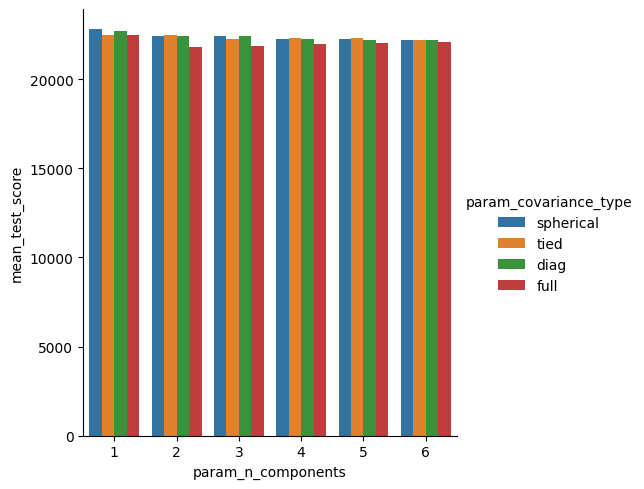

In [110]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="param_n_components",
    y="mean_test_score",
    hue="param_covariance_type",
)
plt.show()

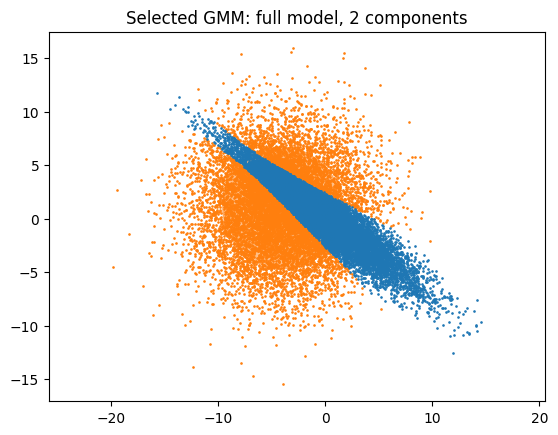

In [111]:
#Only to plot a beautiful chart using linear algebra

from matplotlib.patches import Ellipse
from scipy import linalg

color_iter = sns.color_palette("tab10", 2)[::-1]
Y_ = grid_search.predict(X)

fig, ax = plt.subplots()
# Takes the components shape and its center
for i, (mean, cov, color) in enumerate(
    zip(
        grid_search.best_estimator_.means_,
        grid_search.best_estimator_.covariances_,
        color_iter,
    )
):
    # The eigenvectors of that kinda shape
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"Selected GMM: {grid_search.best_params_['covariance_type']} model, "
    f"{grid_search.best_params_['n_components']} components"
)
plt.axis("equal")
plt.show()

In [112]:
grid_search.best_params_

{'covariance_type': 'full', 'n_components': 2}

aic(X) Akaike information criterion for the current model on the input X.

bic(X) Bayesian information criterion for the current model on the input X.

fit(X[, y]) Estimate model parameters with the EM algorithm.

fit_predict(X[, y]) Estimate model parameters using X and predict the labels for X.

get_metadata_routing() Get metadata routing of this object.

get_params([deep]) Get parameters for this estimator.

predict(X) Predict the labels for the data samples in X using trained model.

predict_proba(X) Evaluate the components' density for each sample.

sample([n_samples]) Generate random samples from the fitted Gaussian distribution.

score(X[, y]) Compute the per-sample average log-likelihood of the given data X.

score_samples(X) Compute the log-likelihood of each sample.

set_params(**params) Set the parameters of this estimator.